In [36]:
from numpy import loadtxt
import numpy as np
import pandas as pd
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [37]:
dataframe = pd.read_csv('pima-indians-diabetes.csv',delimiter=',')
dataframe.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [27]:
X = dataframe.iloc[:,:8]
y = dataframe.iloc[:,8]

In [28]:
dataframe.shape

(767, 9)

In [29]:
features_train,features_test,target_train,target_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [30]:
network = models.Sequential()
network.add(Dense(units=8,activation="relu",input_shape=(features_train.shape[1],)))
network.add(Dense(units=8,activation="relu"))
network.add(Dense(units=1,activation="sigmoid"))
network.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=network.fit(features_train,target_train,epochs=20,verbose=1,batch_size=100,validation_data=(features_test,target_test))

Epoch 1/20
6/6 [==============================] - 1s 29ms/step - loss: 11.0030 - accuracy: 0.4893 - val_loss: 10.9931 - val_accuracy: 0.4843
Epoch 2/20
6/6 [==============================] - 0s 5ms/step - loss: 9.1791 - accuracy: 0.4776 - val_loss: 9.2679 - val_accuracy: 0.4921
Epoch 3/20
6/6 [==============================] - 0s 5ms/step - loss: 7.4801 - accuracy: 0.5049 - val_loss: 7.6694 - val_accuracy: 0.4882
Epoch 4/20
6/6 [==============================] - 0s 5ms/step - loss: 6.2211 - accuracy: 0.4912 - val_loss: 6.4412 - val_accuracy: 0.5236
Epoch 5/20
6/6 [==============================] - 0s 5ms/step - loss: 5.3038 - accuracy: 0.4795 - val_loss: 5.4935 - val_accuracy: 0.5000
Epoch 6/20
6/6 [==============================] - 0s 5ms/step - loss: 4.5751 - accuracy: 0.4698 - val_loss: 4.8093 - val_accuracy: 0.4921
Epoch 7/20
6/6 [==============================] - 0s 5ms/step - loss: 4.1092 - accuracy: 0.4542 - val_loss: 4.2904 - val_accuracy: 0.4882
Epoch 8/20
6/6 [===============

In [38]:
training_loss=history.history["loss"]

In [39]:
test_loss=history.history["val_loss"]

In [40]:
epoch_count=range(1,len(training_loss)+1)

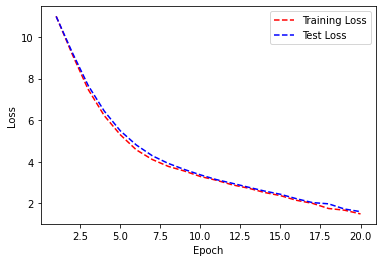

In [41]:
plt.plot(epoch_count,training_loss,"r--")
plt.plot(epoch_count,test_loss,"b--")
plt.legend(["Training Loss","Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()